In [8]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset_luiss.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df

update_dts;main_drvr_occptn_text;main_drvr_sons_0_3_fl;main_drvr_sons_0_17_fl;main_drvr_use_othr_veh_fl;main_drvr_age_at_eff_dt_cls;main_drvr_marital_status_cd;veh_usage_text;claims_with_fault_last_5_yrs;ins_years;drv_type_cd;main_drvr_res_city_name;main_drvr_zone_name;veh_text;cu_class_cd;veh_purch_yr;antitheft_cd;avg_annual_km;veh_cylinder_cpcty;veh_overnight_parking_type_cd;veh_stated_value_amt;;;
0       2023-06-13 17:31:37.107;Operaio generico;0;fal...                                                                                                                                                                                                                                                                                                                                                                 
1       2023-06-14 10:10:41.677;Operaio generico;0;fal...                                                                                                                                                                                                                                                                                                                                                                 
2       2023-06-13 11:29:48.788;Pensionato;0;false;fal...                                                                                                                                                                                                                                                                                                                                                                 
3       2023-06-15 14:52:59.677;Impiegato Azienda;0;tr...                                                                                                                                                                                                                                                                                                                                                                 
4       2023-06-17 07:28:47.780;Operaio generico;0;fal...                                                                                                                                                                                                                                                                                                                                                                 
...                                                   ...                                                                                                                                                                                                                                                                                                                                                                 
272806  2023-06-15 14:19:07.011;Pensionato;0;false;fal...                                                                                                                                                                                                                                                                                                                                                                 
272807  2023-06-16 13:07:16.778;Impiegato Azienda;0;fa...                                                                                                                                                                                                                                                                                                                                                                 
272808  2023-06-16 03:24:53.885;Impiegato generico;0;f...                                                                                                                                                                                                                                                           

In [11]:
# We try to split 1 column into several columns
split_df = df.iloc[:, 0].str.split(';', expand=True)
split_df.replace('', pd.NA, inplace=True)
# Now, drop columns where all values are NaN, which would result from the extra semicolons
split_df.dropna(axis=1, how='all', inplace=True)

column_names = [
    "update_dts", "main_drvr_occptn_text", "main_drvr_sons_0_3_fl", "main_drvr_sons_0_17_fl",
    "main_drvr_use_othr_veh_fl", "main_drvr_age_at_eff_dt_cls", "main_drvr_marital_status_cd",
    "veh_usage_text", "claims_with_fault_last_5_yrs", "ins_years", "drv_type_cd",
    "main_drvr_res_city_name", "main_drvr_zone_name", "veh_text", "cu_class_cd", "veh_purch_yr",
    "antitheft_cd", "avg_annual_km", "veh_cylinder_cpcty", "veh_overnight_parking_type_cd", "veh_stated_value_amt"
]
split_df.columns = column_names
split_df.head(5)

update_dts main_drvr_occptn_text main_drvr_sons_0_3_fl  \
0  2023-06-13 17:31:37.107      Operaio generico                     0   
1  2023-06-14 10:10:41.677      Operaio generico                     0   
2  2023-06-13 11:29:48.788            Pensionato                     0   
3  2023-06-15 14:52:59.677     Impiegato Azienda                     0   
4  2023-06-17 07:28:47.780      Operaio generico                     0   

  main_drvr_sons_0_17_fl main_drvr_use_othr_veh_fl  \
0                  false                     false   
1                  false                     false   
2                  false                     false   
3                   true                     false   
4                  false                     false   

  main_drvr_age_at_eff_dt_cls main_drvr_marital_status_cd veh_usage_text  \
0                    d. 35-45                           M    leisureOnly   
1                    e. 45-55                           C  wayHomeToWork   
2                    g. 65-75                           M    leisureOnly   
3                    e. 45-55                           M  wayHomeToWork   
4                    e. 45-55                           S  wayHomeToWork   

  claims_with_fault_last_5_yrs ins_years  ... main_drvr_res_city_name  \
0                            0        11  ...          GAMBASSI TERME   
1                            0        10  ...             SAN SPERATE   
2                            1        11  ...                  GENOVA   
3                            0         3  ...                   UDINE   
4                            0        11  ...                 LUISAGO   

  main_drvr_zone_name                      veh_text cu_class_cd veh_purch_yr  \
0              CENTRO  MERCEDES Classe A   (W/C169)           1         2020   
1                 SUD  ALFA ROMEO Giulietta  (2010)           1         2016   
2                NORD                   SKODA Kamiq           1         2023   
3                NORD      VOLKSWAGEN Polo 6ª serie          12         2021   
4                NORD           FIAT Panda 3ª serie           1         2018   

  antitheft_cd avg_annual_km veh_cylinder_cpcty veh_overnight_parking_type_cd  \
0            3          5000               1991                           box   
1            2         10000               1598                           box   
2            3         10000                999              uncoveredParking   
3            2         10000                999                           box   
4            2         10000               1248                           box   

  veh_stated_value_amt  
0                500.0  
1               8100.0  
2              23700.0  
3              10900.0  
4              12300.0  

[5 rows x 21 columns]

In [12]:
split_df.shape

(272811, 21)

In [13]:
row_zero = (split_df['main_drvr_sons_0_3_fl'] == '0')
count_rows_zero = row_zero.sum()
print(count_rows_zero)

272811


In [14]:
# Checking how many unique rows exist with the update_date
unique_with_date = split_df.drop_duplicates().shape[0]

unique_without_date = split_df.drop(columns=['update_dts']).drop_duplicates().shape[0]

print(f"Unique rows with update_date: {unique_with_date}")
print(f"Unique rows without update_date: {unique_without_date}")

Unique rows with update_date: 272785
Unique rows without update_date: 219799


#Data Cleaning

In [15]:
split_df.drop(['main_drvr_sons_0_3_fl', 'veh_usage_text', 'main_drvr_res_city_name', 'veh_overnight_parking_type_cd', 'veh_cylinder_cpcty','cu_class_cd'], axis= 1 , inplace= True )

In [16]:
# Dropping duplicate rows
duplicate_rows = split_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 26


In [17]:
cleaned_df = split_df.drop_duplicates()
# Verify the removal
print(f"Rows before removing duplicates: {split_df.shape[0]}")
print(f"Rows after removing duplicates: {cleaned_df.shape[0]}")

Rows before removing duplicates: 272811
Rows after removing duplicates: 272785


In [18]:
rows_zero = (cleaned_df['claims_with_fault_last_5_yrs'] == '0')
count_rows_zero = rows_zero.sum()
print(count_rows_zero)

187191


In [19]:
cleaned_df.isnull().sum()

update_dts                          0
main_drvr_occptn_text               0
main_drvr_sons_0_17_fl              0
main_drvr_use_othr_veh_fl           0
main_drvr_age_at_eff_dt_cls         0
main_drvr_marital_status_cd         0
claims_with_fault_last_5_yrs    55013
ins_years                       84132
drv_type_cd                         0
main_drvr_zone_name                 0
veh_text                            0
veh_purch_yr                        0
antitheft_cd                        0
avg_annual_km                       0
veh_stated_value_amt                0
dtype: int64

In [20]:
cleaned_df['veh_purch_yr'].astype('int64')

0         2020
1         2016
2         2023
3         2021
4         2018
          ... 
272806    2004
272807    2023
272808    2018
272809    2023
272810    2007
Name: veh_purch_yr, Length: 272785, dtype: int64

In [21]:
# Checking vehicles purchased in 2023
df_2023 = cleaned_df[cleaned_df['veh_purch_yr'] == '2023']

# Now calculate and print NA values for the filtered DataFrame
na_values_2023 = df_2023[['claims_with_fault_last_5_yrs', 'ins_years']].isna().sum()

print("NA values for vehicles purchased in 2023:")
print(na_values_2023)


NA values for vehicles purchased in 2023:
claims_with_fault_last_5_yrs    38080
ins_years                       60048
dtype: int64


In [22]:
df_not2023 = cleaned_df[cleaned_df['veh_purch_yr'] != '2023']
filled_values = df_not2023[['ins_years']].isnull().sum()

print("NA values for vehicles purchased in other years:")
print(filled_values)

NA values for vehicles purchased in other years:
ins_years    24084
dtype: int64


In [23]:
cleaned_df['claims_with_fault_last_5_yrs'] = pd.to_numeric(cleaned_df['claims_with_fault_last_5_yrs'], errors='coerce')
cleaned_df['ins_years'] = pd.to_numeric(cleaned_df['ins_years'], errors='coerce')


<ipython-input-23-5f683a054095>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['claims_with_fault_last_5_yrs'] = pd.to_numeric(cleaned_df['claims_with_fault_last_5_yrs'], errors='coerce')
<ipython-input-23-5f683a054095>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['ins_years'] = pd.to_numeric(cleaned_df['ins_years'], errors='coerce')


In [24]:
# Filling zeros for 2023 first if they are not filled yet
cleaned_df.loc[(cleaned_df['veh_purch_yr'] == '2023') & (cleaned_df['claims_with_fault_last_5_yrs'].isna()), 'claims_with_fault_last_5_yrs'] = '0'
cleaned_df.loc[(cleaned_df['veh_purch_yr'] == '2023') & (cleaned_df['ins_years'].isna()), 'ins_years'] = '0'

In [25]:
cleaned_df.isnull().sum()

update_dts                          0
main_drvr_occptn_text               0
main_drvr_sons_0_17_fl              0
main_drvr_use_othr_veh_fl           0
main_drvr_age_at_eff_dt_cls         0
main_drvr_marital_status_cd         0
claims_with_fault_last_5_yrs    16933
ins_years                       24084
drv_type_cd                         0
main_drvr_zone_name                 0
veh_text                            0
veh_purch_yr                        0
antitheft_cd                        0
avg_annual_km                       0
veh_stated_value_amt                0
dtype: int64

In [26]:
cleaned_df['claims_with_fault_last_5_yrs'] = pd.to_numeric(cleaned_df['claims_with_fault_last_5_yrs'], errors='coerce')
cleaned_df['ins_years'] = pd.to_numeric(cleaned_df['ins_years'], errors='coerce')
# Calculate the mean of the column
mean_ins = cleaned_df['claims_with_fault_last_5_yrs'].mean()
mean_claims = cleaned_df['ins_years'].mean()
# Fill missing values with the mean
cleaned_df.loc[cleaned_df['veh_purch_yr'] != 2023, 'claims_with_fault_last_5_yrs'] = cleaned_df.loc[cleaned_df['veh_purch_yr'] != 2023, 'claims_with_fault_last_5_yrs'].fillna(mean_claims)
cleaned_df.loc[cleaned_df['veh_purch_yr'] != 2023, 'ins_years'] = cleaned_df.loc[cleaned_df['veh_purch_yr'] != 2023, 'ins_years'].fillna(mean_claims)


<ipython-input-26-7172cc2cb64b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['claims_with_fault_last_5_yrs'] = pd.to_numeric(cleaned_df['claims_with_fault_last_5_yrs'], errors='coerce')
<ipython-input-26-7172cc2cb64b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['ins_years'] = pd.to_numeric(cleaned_df['ins_years'], errors='coerce')


In [27]:
cleaned_df.isnull().sum()

update_dts                      0
main_drvr_occptn_text           0
main_drvr_sons_0_17_fl          0
main_drvr_use_othr_veh_fl       0
main_drvr_age_at_eff_dt_cls     0
main_drvr_marital_status_cd     0
claims_with_fault_last_5_yrs    0
ins_years                       0
drv_type_cd                     0
main_drvr_zone_name             0
veh_text                        0
veh_purch_yr                    0
antitheft_cd                    0
avg_annual_km                   0
veh_stated_value_amt            0
dtype: int64

In [28]:
cleaned_df.head(15)

update_dts main_drvr_occptn_text main_drvr_sons_0_17_fl  \
0   2023-06-13 17:31:37.107      Operaio generico                  false   
1   2023-06-14 10:10:41.677      Operaio generico                  false   
2   2023-06-13 11:29:48.788            Pensionato                  false   
3   2023-06-15 14:52:59.677     Impiegato Azienda                   true   
4   2023-06-17 07:28:47.780      Operaio generico                  false   
5   2023-06-16 10:02:29.660     Studente generico                  false   
6   2023-06-17 13:36:01.560  Consulente di affari                  false   
7   2023-06-13 11:32:40.019    Impiegato generico                  false   
8   2023-06-13 12:13:49.417      Operaio generico                  false   
9   2023-06-14 13:08:16.671      Operaio generico                   true   
10  2023-06-16 17:17:51.493    Impiegato generico                  false   
11  2023-06-14 11:36:39.917           Disoccupato                  false   
12  2023-06-16 13:36:40.487   Professore generico                  false   
13  2023-06-17 16:59:56.665   Professore generico                   true   
14  2023-06-16 13:12:21.354      Operaio generico                   true   

   main_drvr_use_othr_veh_fl main_drvr_age_at_eff_dt_cls  \
0                      false                    d. 35-45   
1                      false                    e. 45-55   
2                      false                    g. 65-75   
3                      false                    e. 45-55   
4                      false                    e. 45-55   
5                      false                    b. 21-27   
6                      false                    e. 45-55   
7                      false                    c. 27-35   
8                      false                    b. 21-27   
9                      false                    d. 35-45   
10                     false                    d. 35-45   
11                     false                    b. 21-27   
12                     false                    e. 45-55   
13                     false                    f. 55-65   
14                     false                    d. 35-45   

   main_drvr_marital_status_cd  claims_with_fault_last_5_yrs  ins_years  \
0                            M                           0.0       11.0   
1                            C                           0.0       10.0   
2                            M                           1.0       11.0   
3                            M                           0.0        3.0   
4                            S                           0.0       11.0   
5                            S                           0.0        0.0   
6                            M                           0.0       11.0   
7                            S                           0.0        5.0   
8                            M                           1.0        0.0   
9                            M                           0.0       11.0   
10                           S                           0.0       11.0   
11                           S                           0.0        0.0   
12                           S                           0.0        9.0   
13                           M                           0.0        4.0   
14                           M                           0.0        0.0   

   drv_type_cd main_drvr_zone_name                      veh_text veh_purch_yr  \
0           IO              CENTRO  MERCEDES Classe A   (W/C169)         2020   
1           IO                 SUD  ALFA ROMEO Giulietta  (2010)         2016   
2           LA                NORD                   SKODA Kamiq         2023   
3           LA                NORD      VOLKSWAGEN Polo 6ª serie         2021   
4           LA                NORD           FIAT Panda 3ª serie         2018   
5           FA                NORD       LANCIA Ypsilon 3ª serie         2023   
6           LA                NORD                     FIAT 500X       

# Data Preprocessing

In [29]:
columns_to_convert = ['veh_purch_yr', 'avg_annual_km',  'claims_with_fault_last_5_yrs', 'ins_years', 'veh_stated_value_amt']
for column in columns_to_convert:
    # Convert column to numeric
    cleaned_df[column] = pd.to_numeric(cleaned_df[column], errors='coerce')
    cleaned_df[column] = cleaned_df[column].astype(float)

<ipython-input-29-c0bc87205f25>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[column] = pd.to_numeric(cleaned_df[column], errors='coerce')
<ipython-input-29-c0bc87205f25>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[column] = cleaned_df[column].astype(float)
<ipython-input-29-c0bc87205f25>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [30]:
cleaned_df.head(15)

update_dts main_drvr_occptn_text main_drvr_sons_0_17_fl  \
0   2023-06-13 17:31:37.107      Operaio generico                  false   
1   2023-06-14 10:10:41.677      Operaio generico                  false   
2   2023-06-13 11:29:48.788            Pensionato                  false   
3   2023-06-15 14:52:59.677     Impiegato Azienda                   true   
4   2023-06-17 07:28:47.780      Operaio generico                  false   
5   2023-06-16 10:02:29.660     Studente generico                  false   
6   2023-06-17 13:36:01.560  Consulente di affari                  false   
7   2023-06-13 11:32:40.019    Impiegato generico                  false   
8   2023-06-13 12:13:49.417      Operaio generico                  false   
9   2023-06-14 13:08:16.671      Operaio generico                   true   
10  2023-06-16 17:17:51.493    Impiegato generico                  false   
11  2023-06-14 11:36:39.917           Disoccupato                  false   
12  2023-06-16 13:36:40.487   Professore generico                  false   
13  2023-06-17 16:59:56.665   Professore generico                   true   
14  2023-06-16 13:12:21.354      Operaio generico                   true   

   main_drvr_use_othr_veh_fl main_drvr_age_at_eff_dt_cls  \
0                      false                    d. 35-45   
1                      false                    e. 45-55   
2                      false                    g. 65-75   
3                      false                    e. 45-55   
4                      false                    e. 45-55   
5                      false                    b. 21-27   
6                      false                    e. 45-55   
7                      false                    c. 27-35   
8                      false                    b. 21-27   
9                      false                    d. 35-45   
10                     false                    d. 35-45   
11                     false                    b. 21-27   
12                     false                    e. 45-55   
13                     false                    f. 55-65   
14                     false                    d. 35-45   

   main_drvr_marital_status_cd  claims_with_fault_last_5_yrs  ins_years  \
0                            M                           0.0       11.0   
1                            C                           0.0       10.0   
2                            M                           1.0       11.0   
3                            M                           0.0        3.0   
4                            S                           0.0       11.0   
5                            S                           0.0        0.0   
6                            M                           0.0       11.0   
7                            S                           0.0        5.0   
8                            M                           1.0        0.0   
9                            M                           0.0       11.0   
10                           S                           0.0       11.0   
11                           S                           0.0        0.0   
12                           S                           0.0        9.0   
13                           M                           0.0        4.0   
14                           M                           0.0        0.0   

   drv_type_cd main_drvr_zone_name                      veh_text  \
0           IO              CENTRO  MERCEDES Classe A   (W/C169)   
1           IO                 SUD  ALFA ROMEO Giulietta  (2010)   
2           LA                NORD                   SKODA Kamiq   
3           LA                NORD      VOLKSWAGEN Polo 6ª serie   
4           LA                NORD           FIAT Panda 3ª serie   
5           FA                NORD       LANCIA Ypsilon 3ª serie   
6           LA                NORD                     FIAT 500X   
7           LA              CENTRO  ALFA ROMEO Giulietta  (2010)   
8           HA            

In [31]:
drvr_sons = pd.get_dummies(cleaned_df['main_drvr_sons_0_17_fl'], dtype=float)
drvr_sons = drvr_sons.rename(columns={'false': 'drvr_sons_no', 'true': 'drvr_sons_yes'})
print(drvr_sons.head())

   drvr_sons_no  drvr_sons_yes
0           1.0            0.0
1           1.0            0.0
2           1.0            0.0
3           0.0            1.0
4           1.0            0.0


In [32]:
driver_age = pd.get_dummies(cleaned_df['main_drvr_age_at_eff_dt_cls'], dtype=float)

In [33]:
driver_age['age18_35'] = driver_age['a. 18-21'].astype(float) + driver_age['b. 21-27'].astype(float) + driver_age['c. 27-35'].astype(float)
driver_age['age35_65'] = driver_age['d. 35-45'].astype(float) + driver_age['e. 45-55'].astype(float) + driver_age['f. 55-65'].astype(float)
driver_age['age65_100'] = driver_age['g. 65-75'].astype(float) + driver_age['h. 75-85'].astype(float) + driver_age['i. 85-100'].astype(float)
driver_age.drop(['a. 18-21', 'b. 21-27', 'c. 27-35', 'd. 35-45', 'e. 45-55', 'f. 55-65', 'g. 65-75', 'h. 75-85', 'i. 85-100'], axis=1, inplace=True)
driver_age.head()

age18_35  age35_65  age65_100
0       0.0       1.0        0.0
1       0.0       1.0        0.0
2       0.0       0.0        1.0
3       0.0       1.0        0.0
4       0.0       1.0        0.0

In [34]:
drvr_marital_status = pd.get_dummies(cleaned_df['main_drvr_marital_status_cd'], dtype=float)

In [35]:
drv_type = pd.get_dummies(cleaned_df['drv_type_cd'], dtype=float)
drv_type.head()

AA   AN   BA   CA   DA   EA   FA   GA   HA   IA   IO   JA   KA   LA
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

In [36]:
driver_zone = pd.get_dummies(cleaned_df['main_drvr_zone_name'], dtype=float)
driver_zone.tail()

CAMPANIA  CENTRO  NORD  SUD
272806       0.0     0.0   1.0  0.0
272807       0.0     0.0   0.0  1.0
272808       0.0     1.0   0.0  0.0
272809       0.0     1.0   0.0  0.0
272810       0.0     0.0   1.0  0.0

In [37]:
antitheft_type = pd.get_dummies(cleaned_df["antitheft_cd"], dtype=float)
antitheft_type = antitheft_type.rename(columns={'1': 'Othertypes_of_anti-theft_devices', '2': 'Immobilizer', '3': 'No anti-theft', '4': 'Satellite/GPS'})
antitheft_type.head()

Othertypes_of_anti-theft_devices  Immobilizer  No anti-theft  Satellite/GPS
0                               0.0          0.0            1.0            0.0
1                               0.0          1.0            0.0            0.0
2                               0.0          0.0            1.0            0.0
3                               0.0          1.0            0.0            0.0
4                               0.0          1.0            0.0            0.0

In [38]:
columns_to_include = cleaned_df[['claims_with_fault_last_5_yrs', 'ins_years', 'veh_purch_yr',	'avg_annual_km', 'veh_stated_value_amt']]
# Concatenating specified columns from cleaned_df with the other DataFrames/Series
X = pd.concat([columns_to_include, drvr_sons, driver_age, drvr_marital_status, drv_type, driver_zone, antitheft_type], axis=1)
# The shape of the concatenated DataFrame
print(X.shape)


(272785, 36)


In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272785 entries, 0 to 272810
Data columns (total 36 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   claims_with_fault_last_5_yrs      272785 non-null  float64
 1   ins_years                         272785 non-null  float64
 2   veh_purch_yr                      272785 non-null  float64
 3   avg_annual_km                     272785 non-null  float64
 4   veh_stated_value_amt              272785 non-null  float64
 5   drvr_sons_no                      272785 non-null  float64
 6   drvr_sons_yes                     272785 non-null  float64
 7   age18_35                          272785 non-null  float64
 8   age35_65                          272785 non-null  float64
 9   age65_100                         272785 non-null  float64
 10  C                                 272785 non-null  float64
 11  M                                 272785 non-null  float6

In [40]:
X.describe()

claims_with_fault_last_5_yrs      ins_years   veh_purch_yr  \
count                 272785.000000  272785.000000  272785.000000   
mean                       0.511585       6.142078    2018.636798   
std                        1.500874       4.305808       4.923827   
min                        0.000000       0.000000    1973.000000   
25%                        0.000000       2.000000    2017.000000   
50%                        0.000000       6.142078    2020.000000   
75%                        0.000000      11.000000    2022.000000   
max                        6.142078      11.000000    2023.000000   

       avg_annual_km  veh_stated_value_amt   drvr_sons_no  drvr_sons_yes  \
count  272785.000000         272785.000000  272785.000000  272785.000000   
mean    11103.261389           7357.026672       0.721172       0.278828   
std     12824.171498           9545.709452       0.448423       0.448423   
min      1000.000000            500.000000       0.000000       0.000000   
25%     10000.000000            500.000000       0.000000       0.000000   
50%     10000.000000           4200.000000       1.000000       0.000000   
75%     10000.000000          10700.000000       1.000000       1.000000   
max    500000.000000         410219.000000       1.000000       1.000000   

            age18_35       age35_65      age65_100  ...             KA  \
count  272785.000000  272785.000000  272785.000000  ...  272785.000000   
mean        0.276778       0.616383       0.106839  ...       0.013949   
std         0.447407       0.486267       0.308909  ...       0.117278   
min         0.000000       0.000000       0.000000  ...       0.000000   
25%         0.000000       0.000000       0.000000  ...       0.000000   
50%         0.000000       1.000000       0.000000  ...       0.000000   
75%         1.000000       1.000000       0.000000  ...       0.000000   
max         1.000000       1.000000       1.000000  ...       1.000000   

                  LA       CAMPANIA         CENTRO           NORD  \
count  272785.000000  272785.000000  272785.000000  272785.000000   
mean        0.474190       0.093381       0.278256       0.460652   
std         0.499334       0.290966       0.448141       0.498450   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       1.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

                 SUD  Othertypes_of_anti-theft_devices    Immobilizer  \
count  272785.000000                     272785.000000  272785.000000   
mean        0.167711                          0.115538       0.607086   
std         0.373610                          0.319671       0.488399   
min         0.000000                          0.000000       0.000000   
25%         0.000000                          0.000000       0.000000   
50%         0.000000                          0.000000       1.000000   
75%         0.000000                          0.000000       1.000000   
max         1.000000                          1.000000       1.000000   

       No anti-theft  Satellite/GPS  
count  272785.000000  272785.000000  
mean        0.236740       0.040636  
std         0.425082       0.197447  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000  

[8 rows x 36 columns]

# Data Analysis

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

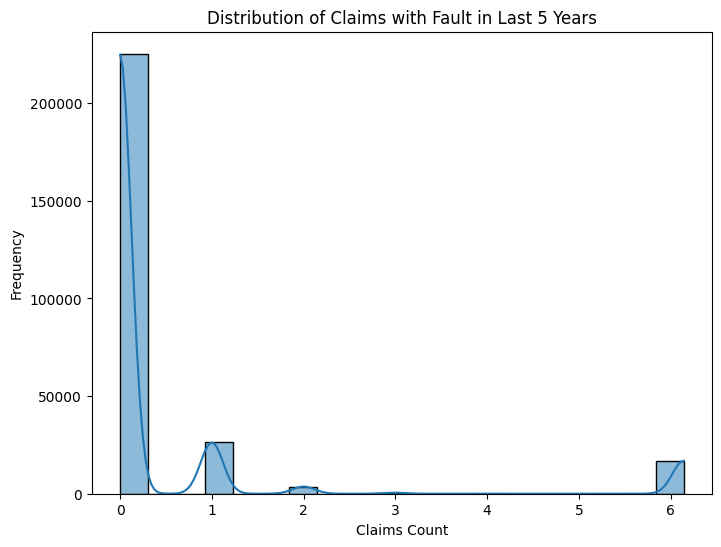

In [52]:
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_df['claims_with_fault_last_5_yrs'], bins=20, kde=True)
plt.title('Distribution of Claims with Fault in Last 5 Years')
plt.xlabel('Claims Count')
plt.ylabel('Frequency')
plt.show()

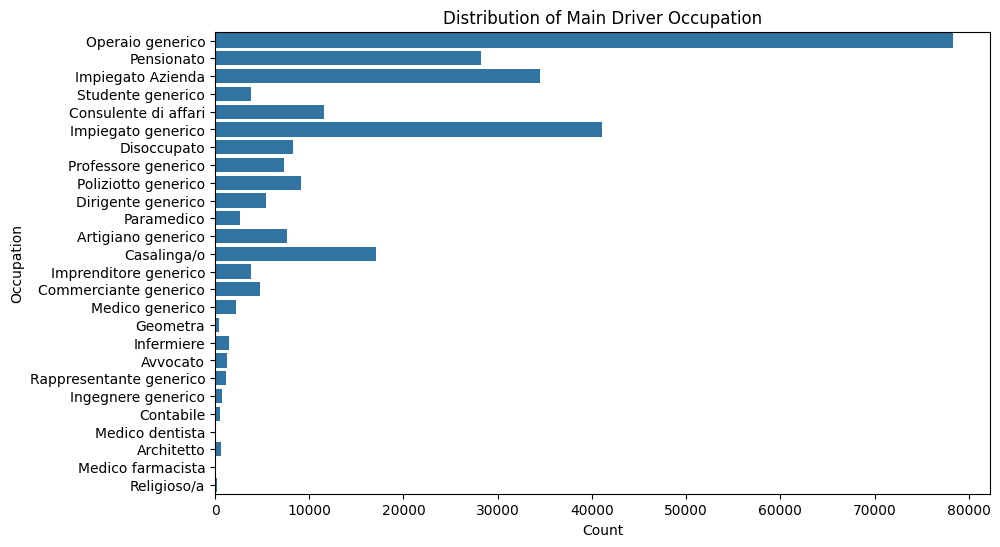

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(y='main_drvr_occptn_text', data=cleaned_df)
plt.title('Distribution of Main Driver Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

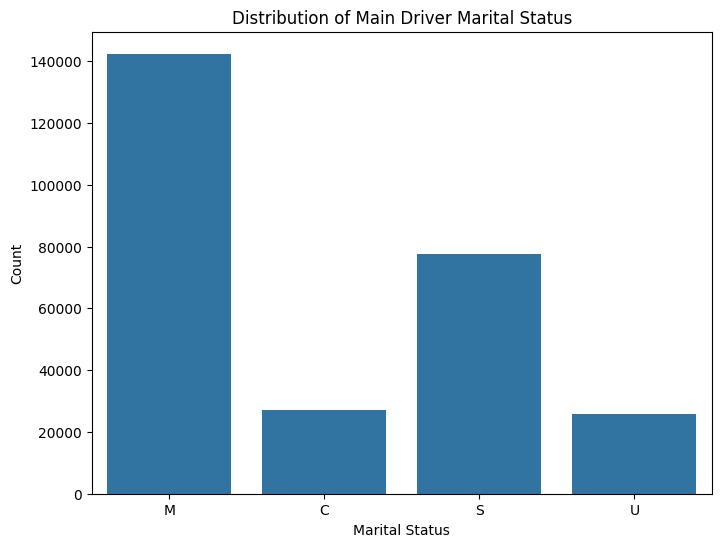

In [54]:
plt.figure(figsize=(8, 6))
sns.countplot(x='main_drvr_marital_status_cd', data=cleaned_df)
plt.title('Distribution of Main Driver Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

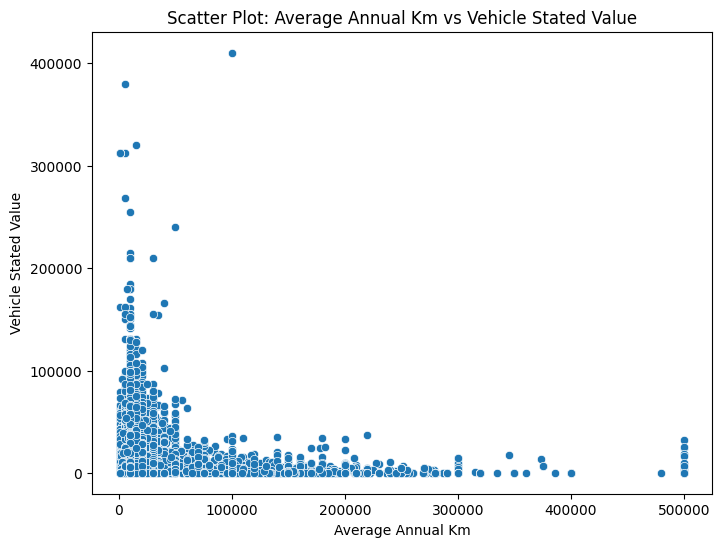

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_annual_km', y='veh_stated_value_amt', data=cleaned_df)
plt.title('Scatter Plot: Average Annual Km vs Vehicle Stated Value')
plt.xlabel('Average Annual Km')
plt.ylabel('Vehicle Stated Value')
plt.show()

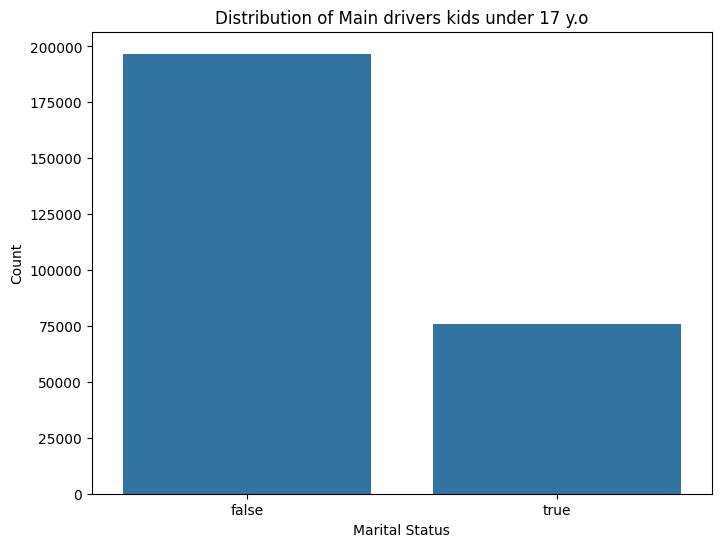

In [56]:
plt.figure(figsize=(8, 6))
sns.countplot(x='main_drvr_sons_0_17_fl', data=cleaned_df)
plt.title('Distribution of Main drivers kids under 17 y.o')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

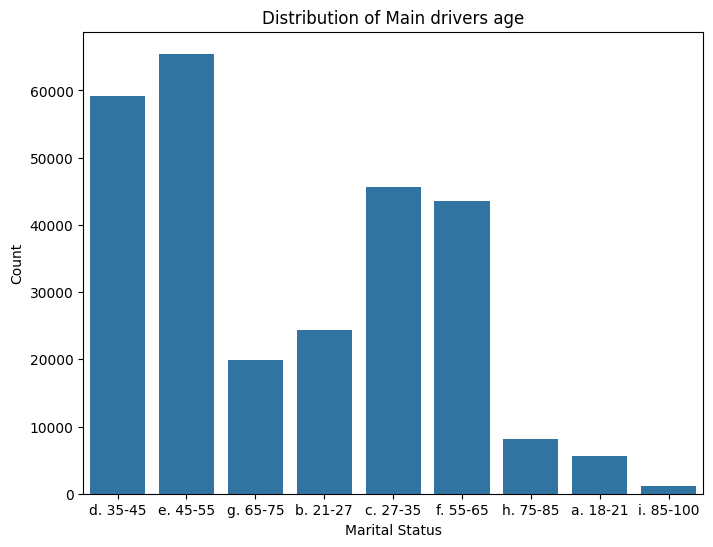

In [57]:
plt.figure(figsize=(8, 6))
sns.countplot(x='main_drvr_age_at_eff_dt_cls', data=cleaned_df)
plt.title('Distribution of Main drivers age')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Clustering Algorithm

In [43]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# X_continuous contains all continuous features
scaler = MinMaxScaler()
columns_to_scale = ['veh_purch_yr', 'ins_years', 'claims_with_fault_last_5_yrs', 'avg_annual_km', 'veh_stated_value_amt']
X_scaled = scaler.fit_transform(X[columns_to_scale])
# X_dummy contains all dummy variables
X_dummy = pd.get_dummies(X[['age18_35', 'age35_65', 'age65_100', 'drvr_sons_no', 'drvr_sons_yes']])

# Combine scaled continuous features with dummy variables
X_combined = np.concatenate((X_scaled, X_dummy), axis=1)

# K_Prototypes clustering
num_continuous_features = 5
kproto = KPrototypes(n_clusters=5, init='Cao', random_state=42)
clusters = kproto.fit_predict(X_combined, categorical=[5, 6, 7, 8, 9])
pd.Series(clusters).value_counts()
print("Cluster Labels:", clusters)
print("Cluster Centroids:", kproto.cluster_centroids_)



Cluster Labels: [4 4 4 ... 0 2 4]
Cluster Centroids: [[0.92789439 0.43943834 0.02246547 0.01967784 0.01571581 0.
  1.         0.         1.         0.        ]
 [0.86530188 0.55910423 0.99736693 0.02085881 0.01200153 0.
  0.         0.         1.         0.        ]
 [0.98789607 0.08132954 0.00915081 0.02141579 0.02148885 1.
  0.         0.         1.         0.        ]
 [0.95421233 0.30065339 0.01718332 0.02034811 0.02017001 0.
  1.         0.         0.         1.        ]
 [0.85737054 0.96080719 0.03176563 0.01963011 0.01392318 0.
  1.         0.         1.         0.        ]]


In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data = pd.DataFrame(X_combined)  # your original data goes here

scaler = MinMaxScaler()
features = ['veh_purch_yr', 'ins_years', 'claims_with_fault_last_5_yrs', 'avg_annual_km', 'veh_stated_value_amt']

# Fit the scaler to the original data
scaler.fit(X[columns_to_scale])

# centroids are coming from a K-Prototypes model
centroids = kproto.cluster_centroids_  # Your centroid data should already be split properly

# Inverse transform the continuous section of the centroids
continuous_centroids = scaler.inverse_transform(centroids[:, :len(features)])
df_continuous_centroids = pd.DataFrame(continuous_centroids, columns=features)

categorical_centroids = centroids[:, len(features):]
df_categorical_centroids = pd.DataFrame(categorical_centroids, columns=['age18_35', 'age35_65', 'age65_100', 'drvr_sons_no', 'drvr_sons_yes'])  # Replace placeholder

# Combine both sections
full_centroids = pd.concat([df_continuous_centroids, df_categorical_centroids], axis=1)
print(full_centroids)


   veh_purch_yr  ins_years  claims_with_fault_last_5_yrs  avg_annual_km  \
0   2019.394719   4.833822                      0.137985   10819.242041   
1   2016.265094   6.150147                      6.125906   11408.548495   
2   2022.394803   0.894625                      0.056205   11686.476858   
3   2020.710616   3.307187                      0.105541   11153.709006   
4   2015.868527  10.568879                      0.195107   10795.424844   

   veh_stated_value_amt  age18_35  age35_65  age65_100  drvr_sons_no  \
0           6939.065051       0.0       1.0        0.0           1.0   
1           5417.256387       0.0       0.0        0.0           1.0   
2           9304.388111       1.0       0.0        0.0           1.0   
3           8764.036475       0.0       1.0        0.0           0.0   
4           6204.592328       0.0       1.0        0.0           1.0   

   drvr_sons_yes  
0            0.0  
1            0.0  
2            0.0  
3            1.0  
4            0.0  


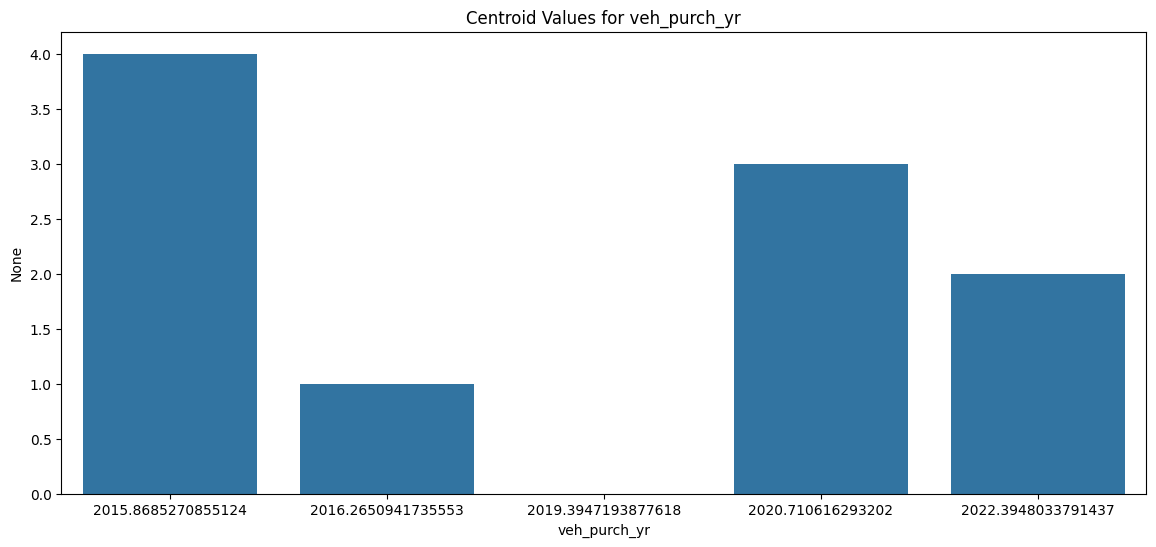

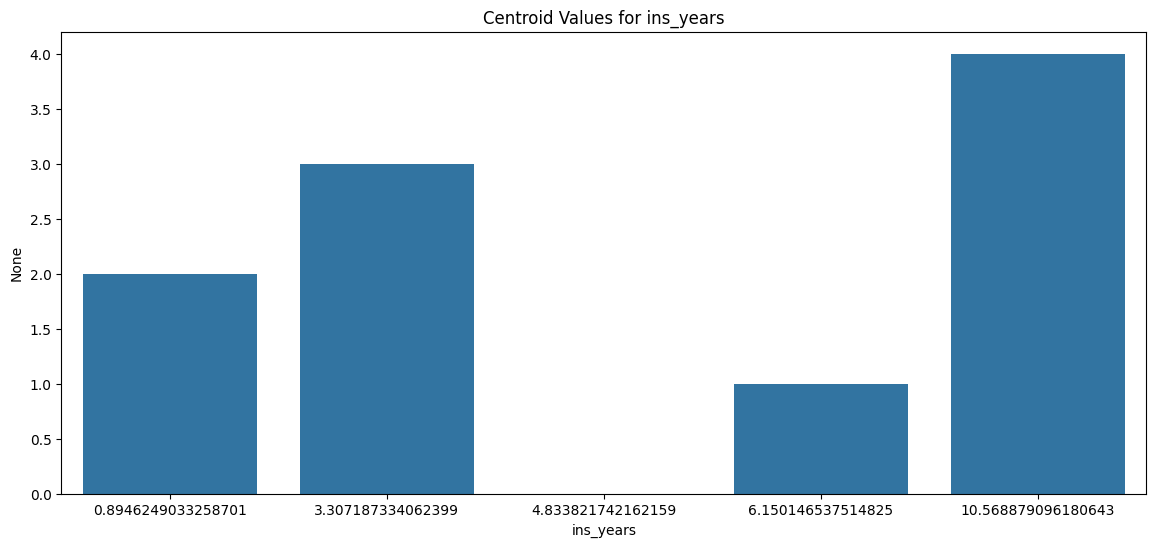

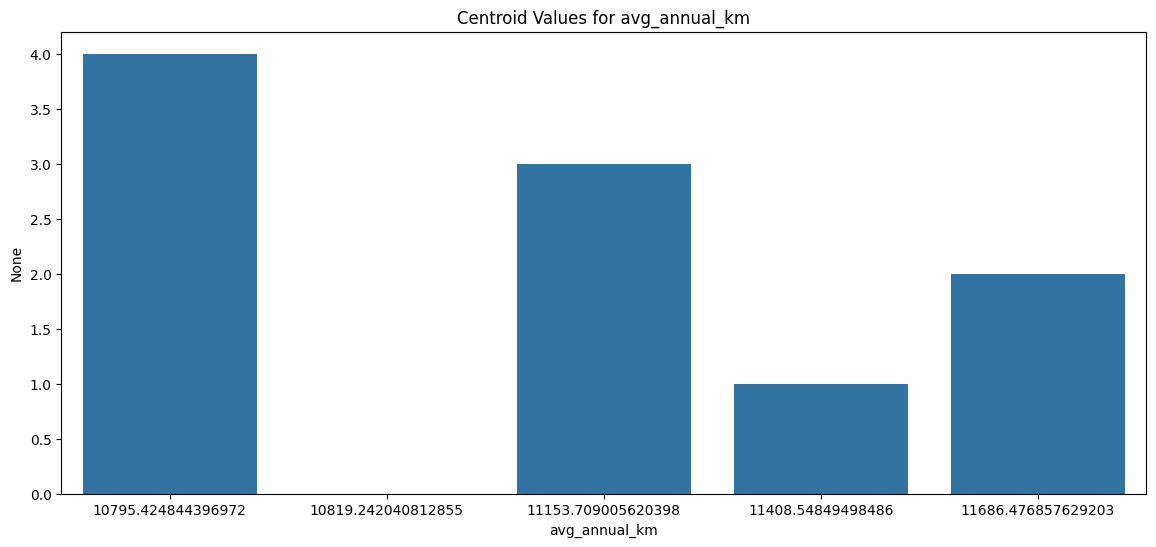

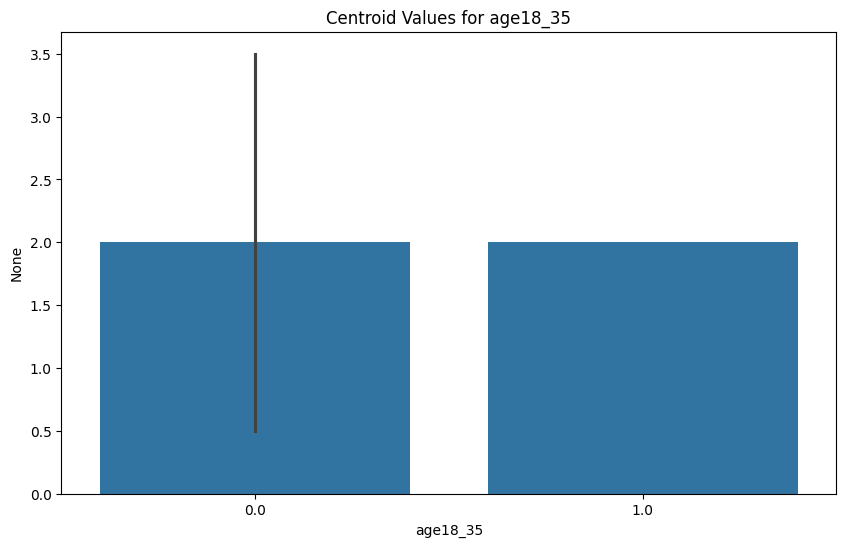

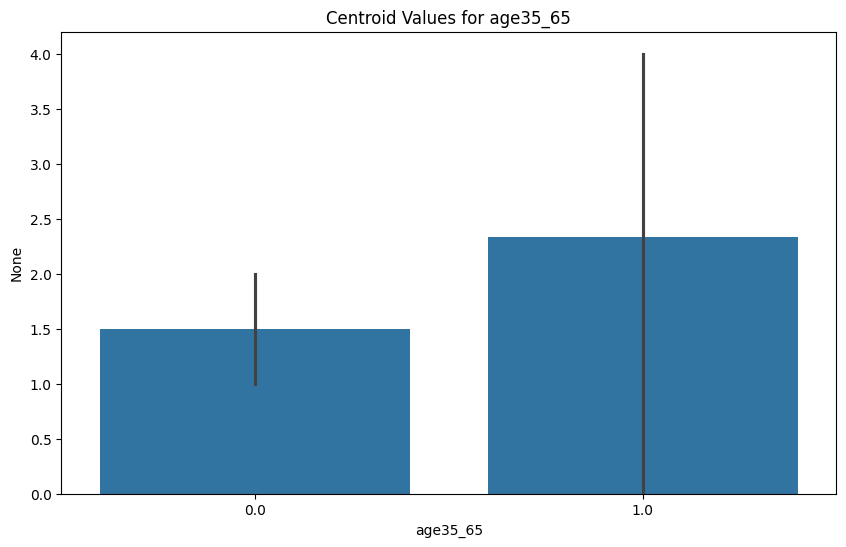

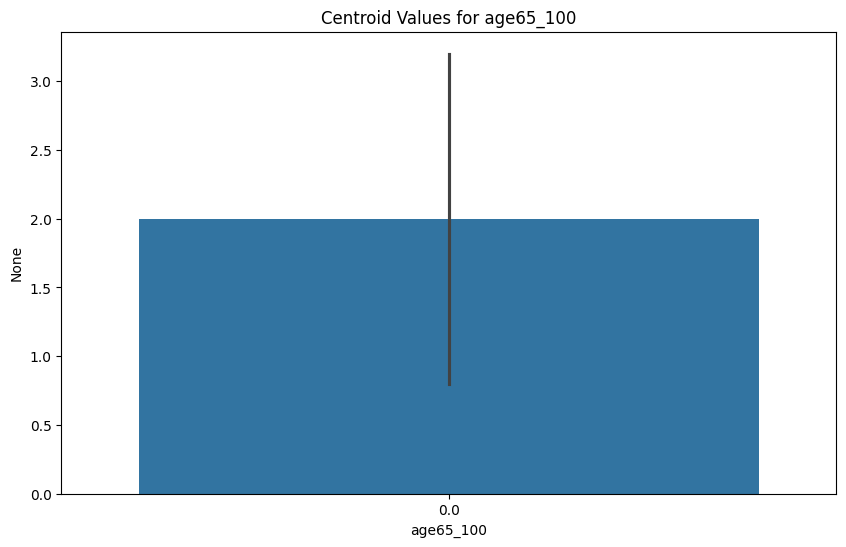

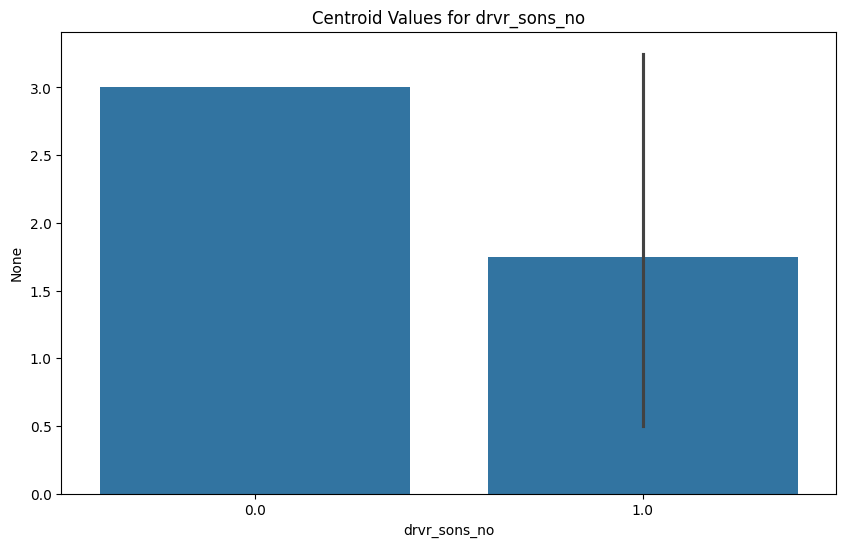

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting continuous data
for feature in features:
    plt.figure(figsize=(14, 6))
    sns.barplot(data=df_continuous_centroids, x=feature, y=full_centroids.index)
    plt.title(f'Centroid Values for {feature}')
    plt.show()

# Plotting categorical data
for feature in X_dummy:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_categorical_centroids, x=feature, y=full_centroids.index)
    plt.title(f'Centroid Values for {feature}')
    plt.show()


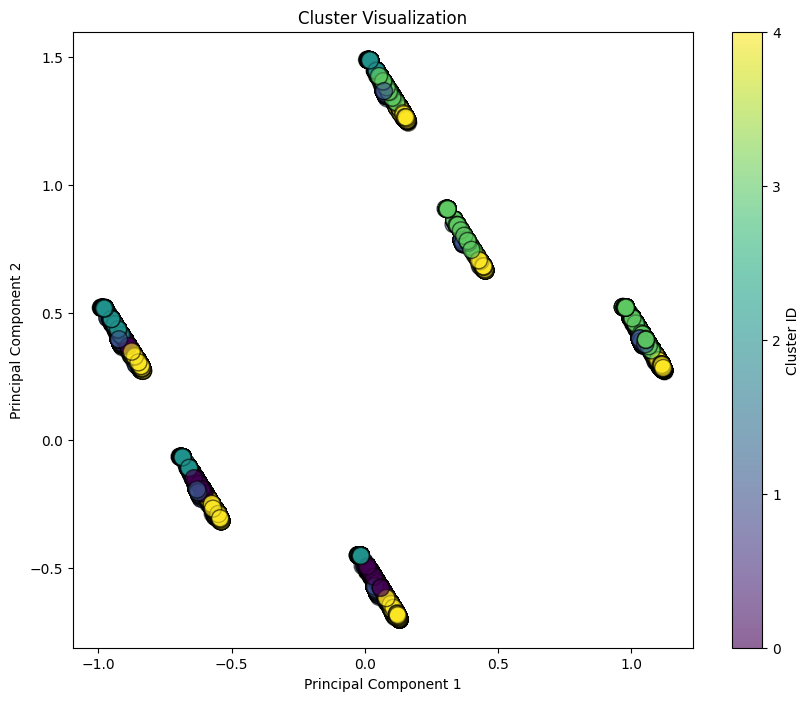

In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)  # Reduce to two principal components for a 2D plot
X_pca = pca.fit_transform(X_combined)

# Plotting the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=150, alpha=0.6, marker='o')
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(ticks=[0, 1, 2, 3, 4], label='Cluster ID')
plt.show()
